
# S03 - Python Intro III

### Lernziele:
- Weiteres zum Plotten mit ```matplotlib```
- List Comprehension
- ```numpy``` Array Broadcasting-Funktionalitäten
- Selbstständige Problemlösung durch Internetrecherche

## S03E01 The one with plotting even more graphs

In [7]:
import matplotlib.pyplot as plt
import numpy as np

### <b>Ticks</b>

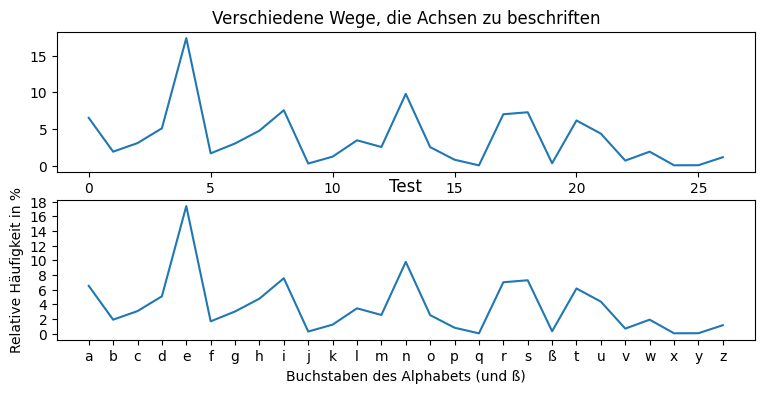

In [8]:
# wir wollen die relative Häufigkeit der Buchstaben in deutschsprachigen Texten graphisch darstellen, dafür haben wir eine Liste mit Daten
relative_frequencies_letters = [6.51, 1.89, 3.06, 5.08, 17.4, 1.66, 3.01, 4.76, 7.55, 0.27, 1.21, 3.44, 2.53, 9.78, 2.51, 0.79, 0.02, 7, 7.27, 0.31, 6.15, 4.35, 0.67, 1.89, 0.03, 0.04, 1.13]
letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','ß','t','u','v','w','x','y','z']

# erst einmal das Grundgerüst des Plots
fig, ax = plt.subplots(2, figsize=(9, 4))
ax[0].set_title("Verschiedene Wege, die Achsen zu beschriften")
ax[1].set_ylabel("Relative Häufigkeit in %")
ax[1].set_xlabel("Buchstaben des Alphabets (und ß)")

# wir können für die x-Achse Zahlenwerte mit angeben...
# ax[0].plot(range(0, 27), relative_frequencies_letters)
# ... oder sie auch weglassen
ax[0].plot(relative_frequencies_letters)

# wir müssen allerdings nicht Zahlenwerte für die Achsen nehmen, auch eine Liste mit Strings funktioniert!
ax[1].plot(letters, relative_frequencies_letters)

# die Ticks auf der x- oder y-Achse können wir auch modifizieren, sodass wir genau die Werte eine Beschriftung haben, die wir wollen
plt.yticks(range(0, 20, 2))
plt.title('Test')

plt.show()

### <b>Andere Plot-Varianten</b>
Weitere Plots mit Beispielen sind [hier](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py) aufgelistet.

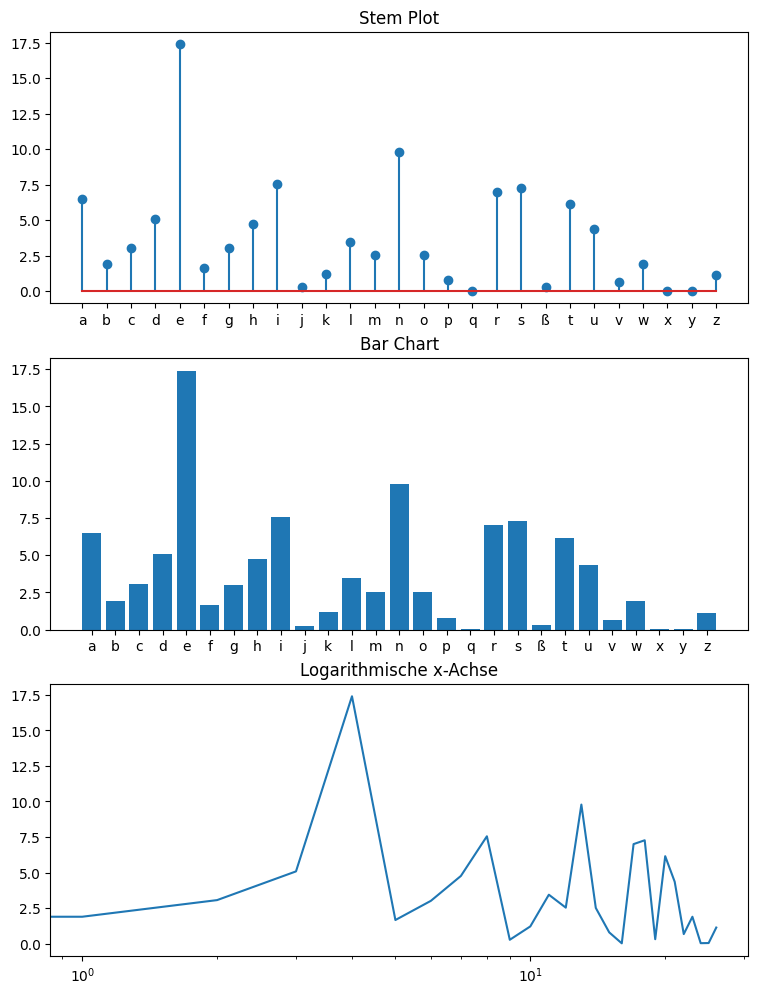

In [9]:
# Wir können auch andere Arten von Plots nutzen!

fig, ax = plt.subplots(3, figsize=(9, 12))

# Stem Plot - gut geeignet, um sich diskrete Werte, z.B. Audiosamples zu visualisieren
ax[0].set_title("Stem Plot")
ax[0].stem(letters, relative_frequencies_letters)

# Bar Chart
ax[1].set_title("Bar Chart")
ax[1].bar(letters, relative_frequencies_letters)

# Logarithmische Achse - sinnvoll, um einen großen Wertebereich übersichtlich darzustellen, zum Beispiel bei einem Frequenzspektrum sehr hilfreich!
# https://xkcd.com/1162
ax[2].set_title("Logarithmische x-Achse")
ax[2].semilogx(relative_frequencies_letters)


plt.show()

### <b>3D-Plots</b>
Eine Übersicht mit verschiedenen 3D-Plots ist auch [hier](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) zu finden.

### Aufgabe 1
Plotten Sie verschiedene geometrische Figuren in 3D. Probieren Sie sich aus! Versuchen Sie sich an folgenden Figuren:
-	Quader
-	Pyramide
-	Haus

Recherchieren Sie, wie man Farbe und Darstellung der Linien verändern kann.

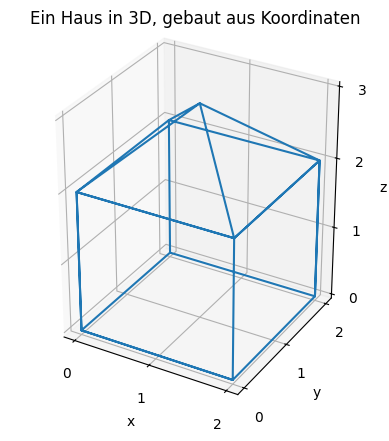

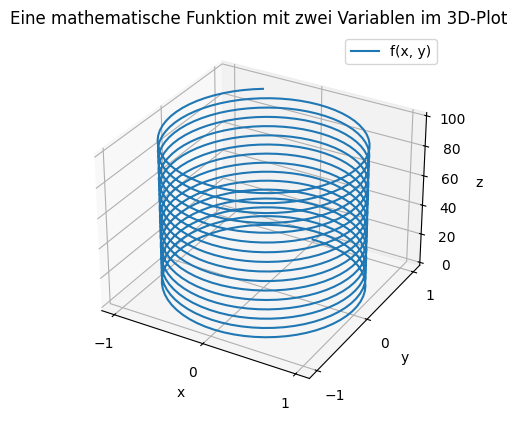

In [10]:
#  Wir plotten ein simples 3D-Haus

# Wir definieren die einzelnen Eckpunkt-Koordinaten in so einer Reihenfolge, dass ein Haus gezeichnet wird
x = [0,0,2,2,0,2,2,2,0,0,2,2,2,2,1,0,0,0,2,1,0,0]
y = [0,2,2,0,0,0,0,2,2,0,0,2,2,2,1,0,0,0,0,1,2,2]
z = [0,0,0,0,0,0,2,2,2,2,2,2,0,2,3,2,0,2,2,3,2,0]

fig = plt.figure()
# "projection='3d' sorgt dafür, dass wir einen 3D_plot haben."
ax = fig.add_subplot(projection='3d')

# Wir ändern das Verhältnis der Achsenskalierungen zueinander, damit das Haus möglichst unverzerrt ist
ax.set_box_aspect((4,4,5))

# Title, Labels und Ticks werden hier definiert
ax.set_title("Ein Haus in 3D, gebaut aus Koordinaten")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks(range(0,3,1))
ax.set_yticks(range(0,3,1))
ax.set_zticks(range(0,4,1))

ax.plot(x,y,z)
plt.show()


# Jetzt plotten wir eine mathematische Funktion mit zwei Variablen (x und y) in 3D

# Gekürzte Schreibweise von oben
ax = plt.figure().add_subplot(projection='3d')

# Title, Labels, Ticks...
ax.set_title("Eine mathematische Funktion mit zwei Variablen im 3D-Plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks(range(-1,2,1))
ax.set_yticks(range(-1,2,1))

# Vektor für die z-Achse
z = np.linspace(0, 100, 1000)

#Werte für x und y (in Abhängigkeit von z)

#x = np.zeros(1000)
#x = z
x = np.sin(z)

#y = np.zeros(1000)
#y = z
y = np.cos(z)

ax.plot(x, y, z, label="f(x, y)")
ax.legend()

plt.show()

## S03E02 The one with list comprehension

## Aufgabe 2
Suchen sie aus der vorgegebenen Liste der gemeinsamen Pflichtmodule aus den Studiengängen Medieninformatik und -technik diejenigen raus...

- ...welche mehr als 6 ECTS haben

- ...welche im Wintersemester stattfinden

Nutzen Sie dafür List Comprehension.

In [11]:
pflichtmodule = [("AnaLina", 12, "WiSe + SoSe"), ("IntroProg", 6, "WiSe"),("MInf", 6, "WiSe"), ("Ana2", 9, "WiSe + SoSe"), ("AlgoDat", 6, "SoSe"), ("Medienerstellung", 5, "SoSe"), ("DigiSys", 6, "SoSe"), ("ITPDG", 6, "WiSe + SoSe"), ("ROrg", 6, "WiSe"), ("Webtech", 6, "WiSe"), ("RnvS", 6, "WiSe"), ("SuS", 6, "WiSe"), ("Medienprojekt", 10, "WiSe + SoSe")]

# Auf konventionellem "C-Weg" würde das so aussehen:

module_viele_ects = []
for modul in pflichtmodule:
    if modul[1] > 6:
        module_viele_ects.append(modul[0])

print("Ergebnis \"C-Style\":\n", module_viele_ects, "\n")

# Die gleiche Funktionalität kann man auch mit List Comprehensions in einer Zeile schreiben.
# Wenn man anhand von den Werten einer Liste (oder Array) eine neue Liste erstellen möchte, ist die List Comprehension ein nützliches Tool, um schlanken Code zu schreiben.

# Die Syntax ist die folgende: newlist = [expression for item in iterable if condition == True]
# Es wird also für jedes Element (-> item) in einer Liste/Array etc. (-> iterable) eine Bedingung (-> condition) geprüft.
# Trifft die Bedingung zu, wird das Ergebnis des Ausdrucks (-> expression) zurückgegeben.
# Dieses Ergebnis kann einfach das Element der Liste, aber auch ein weiter manipulierter Wert oder etwas ganz anderes sein.

# Nach ECTS filtern
module_viele_ects = [name for (name, ects, semester) in pflichtmodule if ects > 6]

print("Ergebnis List Comprehension:\nModule, welche mehr als 6 ETCS haben:\n", module_viele_ects, "\n")

# Nach Wintersemester filtern
module_wintersemester = [name for (name, ects, semester) in pflichtmodule if "WiSe" in semester]
print("Module, welche im Wintersemester stattfinden:\n", module_wintersemester)


Ergebnis "C-Style":
 ['AnaLina', 'Ana2', 'Medienprojekt'] 

Ergebnis List Comprehension:
Module, welche mehr als 6 ETCS haben:
 ['AnaLina', 'Ana2', 'Medienprojekt'] 

Module, welche im Wintersemester stattfinden:
 ['AnaLina', 'IntroProg', 'MInf', 'Ana2', 'ITPDG', 'ROrg', 'Webtech', 'RnvS', 'SuS', 'Medienprojekt']


## S03E03 The one with array broadcasting

In [12]:
#  Array Broadcasting wird automatisch von numpy genutzt, um Arrays mit unterschiedlichen Dimensionen elementweise zu verrechen

a = np.array([[0], [1], [2]])
b = np.array([[3, 4, 5]])

print("-"*10)
print("Shape von Array a: ", a.shape, "->", a.shape[0], "Zeilen, ", a.shape[1], "Spalten")
print("Shape von Array b: ", b.shape, "->", b.shape[0], "Zeilen, ", b.shape[1], "Spalten")

#Eigentlich sollte eine elementweise Addition hier nicht funktionieren, oder? Doch!
# Was ist das Ergebnis einer Addition beider Arrays?

print("a + b ergibt:\n", a+b)
print("Shape von a+b: ", (a+b).shape, "->", (a+b).shape[0], "Zeilen, ", (a+b).shape[1], "Spalten")

# Was wurde getan?
# Die beiden Arrays wurden jeweils um die eigene kürzere Achse dreimal wiederholt, um mit der Dimension des jeweils anderen Arrays zu matchen
# Was dann für die Berechnung (mathematisch betrachtet) getan wurde, ist die Addition zweier (3, 3) Arrays
# Das Ergebnis ist identisch mit

res = np.array([[0, 0, 0],
                [1, 1, 1],
                [2, 2, 2]]) + np.array([[3, 4, 5],
                                        [3, 4, 5],
                                        [3, 4, 5]])
print("Ergebnis manuelle Erweiterung der Arrays:\n", res)
print("-"*10,"\n")

# Dieses Prinzip funktioniert auch bei Arrays mit höheren Dimensionen.

c = np.array([[[1],[2],[3]],[[-1],[-2],[-3]]])
d = np.array([[[10, 20],[30, 40],[50, 60]]])

print("-"*10)
print("Shape von Array c: ", c.shape, "->", c.shape[0], "\"Schichten\", ", c.shape[1], "Zeilen, ", c.shape[2], "Spalten")
print("Shape von Array d: ", c.shape, "->", d.shape[0], "\"Schichten\", ", d.shape[1], "Zeilen, ", d.shape[2], "Spalten")

print("c * d ergibt:\n", c*d)
print("Shape von c+d: ", (c*d).shape, "->", (c*d).shape[0], "\"Schichten\", ", (c*d).shape[1], "Zeilen, ", (c*d).shape[2], "Spalten")
print("-"*10,"\n")

# Dies klappt allerdings nur unter bestimmten Bedingungen. Es werden die Shapes der beiden Operanden (Arrays) verglichen.
# Dabei wird bei diesen von rechts (also "innen") angefangen und nach links hin verglichen. Zwei Dimensionen sind kompatibel, wenn:
# Sie die gleiche Größe haben oder eine der Dimensionen 1 ist.

# Für kompatible Dimensionen, siehe die vorherigen Beispiele

e = np.array([[1], [1], [1]])
f = np.array([[2], [2],])

print("-"*10)
print("Shape von Array e: ", e.shape, "->", e.shape[0], "Zeilen, ", e.shape[1], "Spalten")
print("Shape von Array f: ", f.shape, "->", f.shape[0], "Zeilen, ", f.shape[1], "Spalten")
try:
    e-f
except:
    print("Fehler: Das hat nicht funktioniert, da die ersten Dimensionen (3 und 2) inkompatibel sind.")


# Hat ein Array weniger Dimensionen als das andere, stellt das kein Problem dar, diese fehlenden Dimensionen können als Shape 1 (also mit nur einem Element befüllt) angesehen werden.
g = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
h = np.array([[0.5, 0.25],[0.125, 0.0625]])

print(g/h)
print(g.shape)

----------
Shape von Array a:  (3, 1) -> 3 Zeilen,  1 Spalten
Shape von Array b:  (1, 3) -> 1 Zeilen,  3 Spalten
a + b ergibt:
 [[3 4 5]
 [4 5 6]
 [5 6 7]]
Shape von a+b:  (3, 3) -> 3 Zeilen,  3 Spalten
Ergebnis manuelle Erweiterung der Arrays:
 [[3 4 5]
 [4 5 6]
 [5 6 7]]
---------- 

----------
Shape von Array c:  (2, 3, 1) -> 2 "Schichten",  3 Zeilen,  1 Spalten
Shape von Array d:  (2, 3, 1) -> 1 "Schichten",  3 Zeilen,  2 Spalten
c * d ergibt:
 [[[  10   20]
  [  60   80]
  [ 150  180]]

 [[ -10  -20]
  [ -60  -80]
  [-150 -180]]]
Shape von c+d:  (2, 3, 2) -> 2 "Schichten",  3 Zeilen,  2 Spalten
---------- 

----------
Shape von Array e:  (3, 1) -> 3 Zeilen,  1 Spalten
Shape von Array f:  (2, 1) -> 2 Zeilen,  1 Spalten
Fehler: Das hat nicht funktioniert, da die ersten Dimensionen (3 und 2) inkompatibel sind.
[[[  2.   8.]
  [ 24.  64.]]

 [[ 10.  24.]
  [ 56. 128.]]]
(2, 2, 2)


## S03E04 The one where you learn to help yourself

Im echten Leben, anderen Modulen, sowie auch den Hausaufgaben in diesem Modul müssen wir Lösungen selbstständig durch Internet-Recherche finden
- ...durch eine gezielte Frage in die Suchmaschine des Vertrauens
- ...beim Durchstöbern der Dokumentationen: [Python](https://www.python.org/doc/), [```numpy```](https://numpy.org/doc/stable/index.html), [```scipy```](https://docs.scipy.org/doc/scipy/reference/), [```matplotlib```](https://matplotlib.org/stable/contents.html)
- ...mit Hilfe in Foren wie [Stackoverflow](https://stackoverflow.com/)

Zudem kann man natürlich auch andere Mitstudierende fragen
- Gegenseitige Hilfe ist super
- Hausaufgaben kopieren oder abschreiben ist aber nicht okay!